In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('../../data/movies.csv')
ratings = pd.read_csv('../../data/ratings.csv')
links = pd.read_csv('../../data/links.csv')
tags = pd.read_csv('../../data/tags.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [9]:
tags['userId'].nunique()

58

In [10]:
ratings['userId'].nunique()

610

In [11]:
from surprise import Dataset, Reader
from surprise import SVD, SVDpp, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, SlopeOne
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [12]:
data = ratings.drop('timestamp', axis = 1)
data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [13]:
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [17]:
svd = SVD()

In [18]:
svd.fit(trainset)

In [19]:
preds = svd.test(testset)
accuracy.rmse(preds)

RMSE: 0.8779


0.8778923250896377

In [20]:
preds[:10]

[Prediction(uid=607, iid=2118, r_ui=4.0, est=3.9884412849561985, details={'was_impossible': False}),
 Prediction(uid=232, iid=67734, r_ui=4.0, est=3.410779560292292, details={'was_impossible': False}),
 Prediction(uid=525, iid=6503, r_ui=3.5, est=2.7484263804826097, details={'was_impossible': False}),
 Prediction(uid=135, iid=1, r_ui=4.0, est=4.169663497064945, details={'was_impossible': False}),
 Prediction(uid=408, iid=115210, r_ui=4.0, est=4.169863265438344, details={'was_impossible': False}),
 Prediction(uid=474, iid=39292, r_ui=4.0, est=3.4313395373182756, details={'was_impossible': False}),
 Prediction(uid=448, iid=160730, r_ui=2.0, est=2.855838269020838, details={'was_impossible': False}),
 Prediction(uid=290, iid=1997, r_ui=4.0, est=3.8819864523420535, details={'was_impossible': False}),
 Prediction(uid=414, iid=5422, r_ui=4.0, est=3.3588847674946045, details={'was_impossible': False}),
 Prediction(uid=448, iid=145, r_ui=4.0, est=2.745946943291794, details={'was_impossible': Fa

In [40]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.866785,413.464885,14.097466
BaselineOnly,0.877280,0.215042,0.354634
SVD,0.881523,4.731809,0.357419
KNNBaseline,0.882364,0.371136,3.279861
KNNWithZScore,0.903087,0.272314,2.832555
KNNWithMeans,0.904451,0.186357,2.671215
SlopeOne,0.909538,3.726568,9.392291
NMF,0.933199,6.192310,0.305965
CoClustering,0.949730,2.793200,0.298082


In [21]:
svdpp= SVDpp()
svdpp.fit(trainset)

In [22]:
predictions = svdpp.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8708


0.8707585418381376

<AxesSubplot:>

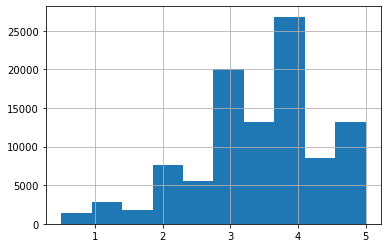

In [46]:
ratings['rating'].hist()

<AxesSubplot:>

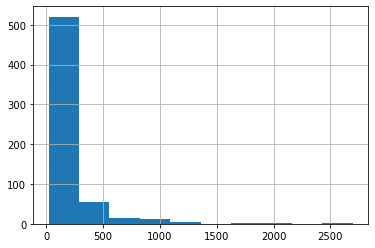

In [26]:
ratings['userId'].value_counts(ascending=True).hist()

In [25]:
ratings.groupby('userId').count()

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [28]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [27]:
#train_data = Dataset.construct_trainset(raw_trainset=trainset)
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
svd = SVD(n_factors= 150, n_epochs=30, lr_all=0.05, reg_all=0.05 )
svd.fit(trainset)

In [28]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.5814


0.581367934175692

In [29]:
predictions = svd.test(trainset)
accuracy.rmse(predictions)

TypeError: 'Trainset' object is not iterable